<table style='border: none' align='left'>
   <tr style='border: none'>
      <th style='border: none'><font face='verdana' size='5' color='black'><b>Use scikit-learn to predict hand-written digits</b></th>
      <th style='border: none'><img src='https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true' alt='Watson Machine Learning icon' height='40' width='40'></th>
   </tr>
   <tr style='border: none'>
       <th style='border: none'><img src='https://github.com/pmservice/wml-sample-models/raw/master/scikit-learn/hand-written-digits-recognition/images/numbers_banner-04.png' width='600' alt='Icon'> </th>
   </tr>
</table>

This notebook demonstrates how to utilize the <a href="https://pypi.python.org/pypi/watson-machine-learning-client" target="_blank" rel="noopener noreferrer">watson-machine-learning-client</a> package in order to save, deploy, and score a predictive model.

Some familiarity with Python is helpful. This notebook uses Python 3.6, scikit-learn, and the Watson Machine Learning (WML) API client (`watson-machine-learning-client`).

You will use the sample data set of hand-written digit images, **sklearn.datasets.load_digits**, which is available in scikit-learn to recognize hand-written digits.

## Learning goals

In this notebook, you will learn how to:

-  Load a sample data set from ``scikit-learn``.
-  Explore data.
-  Split data for training and evaluation.
-  Create a scikit-learn machine learning pipeline.
-  Train and evaluate a model.
-  Store the model in the Watson Machine Learning (WML) repository.
-  Deploy the model for online scoringin the Watson Machine Learning (WML) repository.
-  Score test records.


## Contents

1.	[Set up the environment](#setup)
2.	[Load and explore data](#load)
3.	[Create a scikit-learn model](#model)
4.	[Save, load, and delete a model in the WML repository](#persistence)
5.	[Deploy and score data in the WML repository](#scoring)
6.	[Summary and next steps](#summary)

<a id='setup'></a>
## 1. Set up the environment

Before you use the sample code in this notebook, you must perform the following setup tasks:

-  Create a <a href="https://cloud.ibm.com/catalog/services/machine-learning" target="_blank" rel="noopener no referrer">Watson Machine Learning (WML) Service</a> instance (a free plan is offered and information about how to create the instance can be found <a href="https://dataplatform.ibm.com/docs/content/analyze-data/wml-setup.html" target="_blank" rel="noopener no referrer">here</a>)

- Configure your local python environment:
  + python 3.6
  + scikit-learn 0.19.1
  + watson-machine-learning-client

**Tip**: Run the cell below to install packages from <a href='https://pypi.python.org/pypi' target='_blank' rel='noopener no referrer'>PyPI</a>.

In [1]:
# Remove current wml package files.
!rm -rf $PIP_BUILD/watson-machine-learning-client

In [ ]:
# Install watson-machine-learning-client required for online deployment and scoring.
!pip install --user watson-machine-learning-client --upgrade

<a id='load'></a>
## 2. Load and explore data

In this section, you will load the data from scikit-learn sample data sets and perform basic exploratory data analysis (EDA).

In [ ]:
!pip install scikit-learn==0.19.1

In [4]:
# Load the data.
import sklearn
from sklearn import datasets

# Description of the Digits Data set.
digits = datasets.load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

The sample data set consists of 8x8 pixel images of hand-written digits.

In [5]:
digits.data.shape

(1797, 64)

Display the first digit data and label using **data** and **target**. The hand-written digit shown below is an 8x8 pixel image represented by an array.

In [6]:
print(digits.data[0].reshape((8, 8)))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [7]:
digits.target[0]

0

In [8]:
import matplotlib.pyplot as plt
import numpy as np

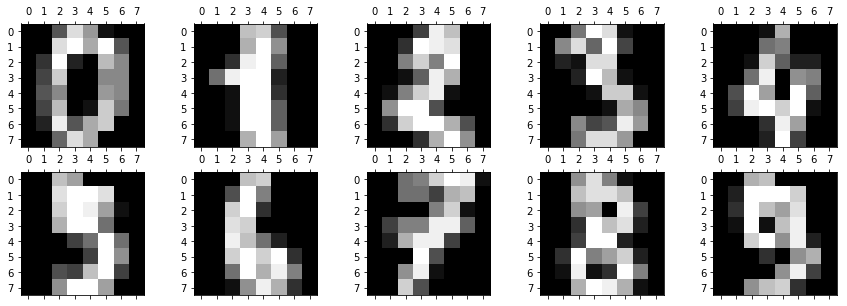

In [9]:
# Visualize some digits from the data set.
f, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(15,5))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i in range (len(ax)):
    plt.gray()
    ax[i].matshow(digits.images[i])

In [10]:
# Labels for the written digits displayed above.
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In the next step, count the data examples.

In [11]:
# Calculate the number of samples.
samples_count = len(digits.images)

print('Number of samples: ' + str(samples_count))

Number of samples: 1797


<a id='model'></a>
## 3. Create a scikit-learn model

In this section you learn how to:
- [3.1 Split data](#prep)
- [3.2 Create a scikit-learn machine learning pipeline](#pipe)
- [3.3 Train a model](#train)

### 3.1 Split data<a id='prep'></a>

In this subsection you will split your data into: 
- Train data set
- Test data set
- Score data sets

In [12]:
# Split the data into data sets and display the number of records for each data set.
train_data = digits.data[: int(0.7*samples_count)]
train_labels = digits.target[: int(0.7*samples_count)]

test_data = digits.data[int(0.7*samples_count): int(0.9*samples_count)]
test_labels = digits.target[int(0.7*samples_count): int(0.9*samples_count)]

score_data = digits.data[int(0.9*samples_count): ]

print('Number of training records: ' + str(len(train_data)))
print('Number of testing records : ' + str(len(test_data)))
print('Number of scoring records : ' + str(len(score_data)))

Number of training records: 1257
Number of testing records : 360
Number of scoring records : 180


Your data has been successfully split into three data sets: 

-  The train data set, which is the largest group, is used for training.
-  The test data set will be used for model evaluation and is used to test the assumptions of the model.
-  The score data set will be used for scoring in Cloud.

### 3.2 Create a scikit-learn machine learning pipeline<a id='pipe'></a>

In this section, you will create a scikit-learn machine learning pipeline and then train the model.

First, import the scikit-learn machine learning modules that are needed in the subsequent steps.

In [13]:
# Import scikit-learn packages.
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import svm, metrics

Standardize the features by removing the mean and scaling to unit variance.

In [14]:
scaler = preprocessing.StandardScaler()

Next, define the estimators you want to use for classification. The following example uses Support Vector Machines (SVM) with the radial basis function (used for non-linear data) as kernel.

In [15]:
clf = svm.SVC(kernel='rbf')

Build the pipeline. A pipeline consists of transformer and an estimator.

In [16]:
pipeline = Pipeline([('scaler', scaler), ('svc', clf)])

### 3.3 Train a model<a id='train'></a>

Now, you can use the **pipeline** and **train data** you defined previously to train your SVM model.

In [17]:
model = pipeline.fit(train_data, train_labels)

Use **test data** to generate an evaluation report to check your **model quality**.

In [18]:
# Evaluate your model.
predicted = model.predict(test_data)

print('Evaluation report: \n\n%s' % metrics.classification_report(test_labels, predicted))

Evaluation report: 

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        37
          1       0.97      0.97      0.97        34
          2       1.00      0.97      0.99        36
          3       1.00      0.94      0.97        35
          4       0.78      0.97      0.87        37
          5       0.97      0.97      0.97        38
          6       0.97      0.86      0.91        36
          7       0.92      0.97      0.94        35
          8       0.91      0.89      0.90        35
          9       0.97      0.92      0.94        37

avg / total       0.95      0.94      0.95       360



**Note:** You can tune your model, or try creating classification models to achieve better accuracy. For simplicity of this example, the tuning section and model selection are omitted.

<a id='persistence'></a>
## 4. Save, load, and delete a model in the WML repository

In this section, you will learn how to use the `watson-machine-learning-client` package to manage your model in the WML repository.

- [4.1 Set up the WML instance](#work)
- [4.2 Save the model in the WML repository](#save)
- [4.3 Load a model from the WML repository](#load_model)
- [4.4 Delete a model from the WML repository](#delete)

**Tip**: You can find more information about the watson-machine-learning-client <a href="https://console.bluemix.net/docs/services/service_credentials.html#service_credentials" target="_blank" rel="noopener no referrer">here</a>[](https://wml-api-pyclient.mybluemix.net).

### 4.1 Set up the WML instance<a id='work'></a>

First, import required modules.

In [19]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

**Note**: A deprecation warning is returned from scikit-learn package that does not impact watson machine learning client functionalities.
Authenticate to the Watson Machine Learning service on the IBM Cloud.

**Tip**: Authentication information (your credentials) can be found in the <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-get-wml-credentials.html" target="_blank" rel="noopener no referrer">Service credentials</a> tab of the service instance that you created on the IBM Cloud. <BR>If you cannot find the **instance_id** field in **Service Credentials**, click **New credential (+)** to generate new authentication information. 

**Action**: Enter your Watson Machine Learning service instance credentials here.


In [20]:
wml_credentials = {
    "apikey": "***",
    "instance_id": "***",
    "password": "***",
    "url": "https://ibm-watson-ml.mybluemix.net",
    "username": "***"
}

#### Instantiate the WML API client object. 

In [22]:
client = WatsonMachineLearningAPIClient(wml_credentials)

#### Get instance details.

In [23]:
import json

instance_details = client.service_instance.get_details()

### 4.2 Save the model in the WML repository<a id='save'></a>

Define the model name when saving the model in the WML repository.

In [24]:
published_model = client.repository.store_model(model=model, meta_props={'name':'Digits prediction model'}, \
                                                training_data=train_data, training_target=train_labels)

#### Get information about a specific model in the WML repository.

In [25]:
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

print(json.dumps(model_details, indent=2))

{
  "metadata": {
    "guid": "bd774b79-1bb7-4396-9edf-d7acb57a3fe0",
    "url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/b4b6c696-172c-4164-8049-c0b621dbf3c9/published_models/bd774b79-1bb7-4396-9edf-d7acb57a3fe0",
    "created_at": "2019-07-08T20:29:03.612Z",
    "modified_at": "2019-07-08T20:29:03.697Z"
  },
  "entity": {
    "runtime_environment": "python-3.6",
    "learning_configuration_url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/b4b6c696-172c-4164-8049-c0b621dbf3c9/published_models/bd774b79-1bb7-4396-9edf-d7acb57a3fe0/learning_configuration",
    "name": "Digits prediction model",
    "label_col": "l1",
    "learning_iterations_url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/b4b6c696-172c-4164-8049-c0b621dbf3c9/published_models/bd774b79-1bb7-4396-9edf-d7acb57a3fe0/learning_iterations",
    "training_data_schema": {
      "features": {
        "type": "ndarray",
        "fields": [
          {
            "name": "f0",
            "type": "float"

#### Get information of all the models in the WML repository.

In [26]:
models_details = client.repository.list_models()

------------------------------------  -------------------------------------------  ------------------------  -----------------
GUID                                  NAME                                         CREATED                   FRAMEWORK
bd774b79-1bb7-4396-9edf-d7acb57a3fe0  Digits prediction model                      2019-07-08T20:29:03.612Z  scikit-learn-0.19
53b90fb3-0d12-4d66-96c8-b4e4cf96a0ae  Customer churn Spark model                   2019-07-03T15:47:49.776Z  mllib-2.3
ad24c140-f97a-49f2-b02c-f8ce44a58c27  Custom ARIMA estimator for sklearn pipeline  2019-07-03T01:04:33.998Z  scikit-learn-0.19
471b39cc-9c3b-4ff9-a8ea-0297efe0ca5d  Boston house price prediction                2019-05-20T18:19:55.433Z  scikit-learn-0.19
fc5462c8-7eb9-4dda-8b0a-947e2faa30da  WML Product Line Prediction Model            2019-05-17T17:33:53.278Z  mllib-2.3
a57e82a9-076e-4236-8bd2-7465e726c419  WML Product Line Prediction Model            2019-05-17T17:28:36.434Z  mllib-2.3
914b598b-f52e-4a

### 4.3 Load a model from the WML repository<a id='load_model'></a>

In this subsection, you will learn how to load a saved model from a specific WML instance.

In [27]:
loaded_model = client.repository.load(published_model_uid)

Make test predictions to check that the model has been loaded correctly.

In [28]:
test_predictions = loaded_model.predict(test_data[:10])

In [29]:
# The predictions made by the model.
print(test_predictions)

[4 0 5 3 6 9 6 4 7 5]


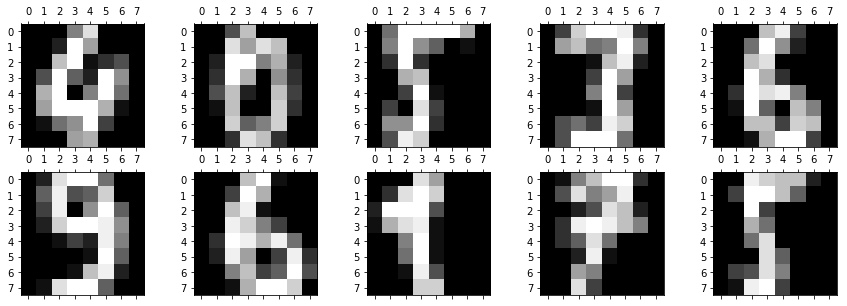

In [30]:
# Visualize the test set images used for the prediction.
f, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(15,5))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i in range (len(ax)):
    plt.gray()
    ax[i].matshow(test_data[i].reshape((8, 8)))

In [31]:
# The correct labels for the digits above.
test_labels[:10]

array([4, 0, 5, 3, 6, 9, 6, 1, 7, 5])

As you can see, you are able to make predictions which means that the model has loaded correctly. You have now learned how save and load the model in/from the WML repository.

### 4.4 Delete a model from the WML repository<a id='delete'></a>

The code in the following cell deletes a published model from the WML repository. The code is not executable at this stage because you still need the model for deployment.

<a id='scoring'></a>
## 5. Deploy and score data in the WML repository

In this section, you will learn how to use the WML API client to perform online scoring and score a test data record.

- [5.1 Create an online deployment for the published model](#create)
- [5.2 Get deployments](#getdeploy)
- [5.3 Score data](#score)
- [5.4 Delete the deployment](#deldeploy)
- [5.5 Delete the model](#delmodel)


### 5.1 Create an online deployment for the published model<a id='create'></a>

In [32]:
created_deployment = client.deployments.create(published_model_uid, 'Deployment of scikit model')



#######################################################################################

Synchronous deployment creation for uid: 'bd774b79-1bb7-4396-9edf-d7acb57a3fe0' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ef8e0308-07ef-468a-bb72-06b2e9c4d4b8'
------------------------------------------------------------------------------------------------




**Note**: You use the deployment url saved in published_model_uid object. The next section shows you how to retrieve the deployment url from the WML instance.

Now, you can define and print an online scoring endpoint. 

### 5.2 Get deployments<a id='getdeploy'></a>

In [34]:
deployments = client.deployments.get_details()

You can get the deployment_url by parsing the deployment details for the last deployed model.

### 5.3 Score data<a id='score'></a>

Use the following method to run a test scoring request against the deployed model.

**Action**: Prepare scoring payload with the records to score.

In [36]:
scoring_payload = {'values': [list(score_data[0]), list(score_data[1])]}

Use the ``client.deployments.score()`` method to run the scoring.

In [37]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)

In [38]:
print(json.dumps(predictions, indent=2))

{
  "fields": [
    "prediction"
  ],
  "values": [
    [
      5
    ],
    [
      2
    ]
  ]
}


### 5.4 Delete the deployment<a id='deldeploy'></a>

Use the following method to delete the deployment.

In [39]:
client.deployments.delete(client.deployments.get_uid(created_deployment))

'SUCCESS'

You can check that your deployment was deleted by generating a list of your saved deployments:

In [40]:
client.deployments.list()

------------------------------------  -------------------------------------------------------  -------  ------------------  ------------------------  -----------------  -------------
GUID                                  NAME                                                     TYPE     STATE               CREATED                   FRAMEWORK          ARTIFACT TYPE
7985e484-4192-400e-82e5-3756d4600668  ARIMA model python function deployment                   online   DEPLOY_SUCCESS      2019-07-03T20:33:40.817Z  n/a                function
6aedb5b7-638a-4388-ab0d-45fecb3b7081  Customer Churn Prediction                                online   DEPLOY_SUCCESS      2019-07-03T15:51:34.166Z  mllib-2.3          model
cfcd5f9e-5b07-4bea-b57d-304c12254add  sklearn_pipeline_arima                                   online   DEPLOY_SUCCESS      2019-07-03T01:06:29.302Z  scikit-learn-0.19  model
7b045679-07c9-4225-9116-c153c6359588  Virtual deployment of Boston model                       virtual  DE

### 5.5 Delete the model<a id='delmodel'></a>

In [41]:
client.repository.delete(published_model_uid)

'SUCCESS'

You can check that your model was deleted by generating a list of your saved models:

In [42]:
client.repository.list_models()

------------------------------------  -------------------------------------------  ------------------------  -----------------
GUID                                  NAME                                         CREATED                   FRAMEWORK
53b90fb3-0d12-4d66-96c8-b4e4cf96a0ae  Customer churn Spark model                   2019-07-03T15:47:49.776Z  mllib-2.3
ad24c140-f97a-49f2-b02c-f8ce44a58c27  Custom ARIMA estimator for sklearn pipeline  2019-07-03T01:04:33.998Z  scikit-learn-0.19
471b39cc-9c3b-4ff9-a8ea-0297efe0ca5d  Boston house price prediction                2019-05-20T18:19:55.433Z  scikit-learn-0.19
fc5462c8-7eb9-4dda-8b0a-947e2faa30da  WML Product Line Prediction Model            2019-05-17T17:33:53.278Z  mllib-2.3
a57e82a9-076e-4236-8bd2-7465e726c419  WML Product Line Prediction Model            2019-05-17T17:28:36.434Z  mllib-2.3
914b598b-f52e-4a87-bfed-2f4163eba25e  Boston house price prediction                2019-05-13T21:11:04.132Z  scikit-learn-0.19
43dbda1f-34f4-43

<a id='summary'></a>
## 6. Summary and next steps     

You successfully completed this notebook! 
 
You learned how to use scikit-learn machine learning as well as Watson Machine Learning (WML) API client for model creation and deployment. 

Check out our <a href="https://dataplatform.ibm.com/docs/content/analyze-data/wml-setup.html" target="_blank" rel="noopener noreferrer">Online Documentation</a> for more samples, tutorials, documentation, how-tos, and blog posts. 

### Authors

**Wojciech Sobala** is a Data Scientist at IBM developing enterprise-level applications that substantially increases clients' ability to turn data into actionable knowledge.  
**Ananya Kaushik** is a Data Scientist at IBM.

Copyright © 2017-2019 IBM. This notebook and its source code are released under the terms of the MIT License.

<div style='background:#F5F7FA; height:110px; padding: 2em; font-size:14px;'>
<span style='font-size:18px;color:#152935;'>Love this notebook? </span>
<span style='font-size:15px;color:#152935;float:right;margin-right:40px;'>Don't have an account yet?</span><br>
<span style='color:#5A6872;'>Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style='border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;'><a href='https://ibm.co/wsnotebooks' target='_blank' style='color: #3d70b2;text-decoration: none;'>Sign Up</a></span><br>
</div>